<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/DataProcessingSon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import numpy as np
import cv2
from PIL import Image
from skimage.transform import resize
from skimage import exposure
from scipy.ndimage import gaussian_filter
import shutil
import matplotlib.pyplot as plt

# Kaynak ve yeni hedef klasör yolları
klasor_yollari = {
    'Control-Axial': '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial',
    'Control-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal',
    'MS-Axial': '/content/drive/MyDrive/Multiple Sclerosis/MS-Axial',
    'MS-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'
}
yeni_klasor_yollari = {
    'Control-Axial': '/content/drive/MyDrive/Multiple Sclerosis/1/Control-Axial',
    'Control-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis/1/Control-Sagittal',
    'MS-Axial': '/content/drive/MyDrive/Multiple Sclerosis/1/MS-Axial',
    'MS-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis/1/MS-Sagittal'
}
# Yeni hedef klasörleri oluşturma
for klasor_yolu in yeni_klasor_yollari.values():
    os.makedirs(klasor_yolu, exist_ok=True)

# Her kategoriden eşit sayıda ve sağlıklı görüntüleri seçme
ornek_sayisi = 500
secilen_goruntuler = {}
for kategori, klasor_yolu in klasor_yollari.items():
    dosyalar = [dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith('.png')]
    secilen_dosyalar = random.sample(dosyalar, min(ornek_sayisi, len(dosyalar)))
    secilen_goruntuler[kategori] = [os.path.join(klasor_yolu, dosya) for dosya in secilen_dosyalar]

# Görüntülerin sağlıklı olup olmadığını kontrol ederek yeni klasörlere kopyalama
def kontrol_et_ve_yukle(dosya_yolu, hedef_klasor):
    try:
        with Image.open(dosya_yolu) as img:
            img.verify()
            shutil.copy(dosya_yolu, hedef_klasor)
    except (IOError, SyntaxError):
        print(f"Bozuk dosya: {dosya_yolu}")

for kategori, goruntu_yollari in secilen_goruntuler.items():
    hedef_klasor = yeni_klasor_yollari[kategori]
    for goruntu_yolu in goruntu_yollari:
        kontrol_et_ve_yukle(goruntu_yolu, hedef_klasor)

# Kopyalanan dosya sayısını kontrol etme
for kategori, klasor_yolu in yeni_klasor_yollari.items():
    print(f"{kategori} yeni klasöründeki dosya sayısı: {len(os.listdir(klasor_yolu))}")

Control-Axial yeni klasöründeki dosya sayısı: 500
Control-Sagittal yeni klasöründeki dosya sayısı: 500
MS-Axial yeni klasöründeki dosya sayısı: 500
MS-Sagittal yeni klasöründeki dosya sayısı: 500


In [ ]:
import os
import numpy as np
import cv2
from PIL import Image

# Klasör yolları
yeni_klasor_yollari = {
    'Control-Axial': '/content/drive/MyDrive/Multiple Sclerosis/1/Control-Axial',
    'Control-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis/1/Control-Sagittal',
    'MS-Axial': '/content/drive/MyDrive/Multiple Sclerosis/1/MS-Axial',
    'MS-Sagittal': '/content/drive/MyDrive/Multiple Sclerosis/1/MS-Sagittal'
}

# İşleme fonksiyonları
def process_image(image_path):
    # Görüntüyü yükle
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Non-local means denoising
    denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

    # CLAHE uygula
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_image = clahe.apply(denoised_image)

    # Unsharp masking
    gaussian_blurred = cv2.GaussianBlur(clahe_image, (9,9), 10)
    sharpened_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blurred, -0.5, 0)

    return sharpened_image

# Veri setlerini toplama ve ön işleme
veri_setleri = {}

for klasor_adi, klasor_yolu in yeni_klasor_yollari.items():
    dosyalar = [dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith('.png')]
    veri_setleri[klasor_adi] = [process_image(os.path.join(klasor_yolu, dosya)) for dosya in dosyalar]

Control-Axial için işlenen görüntülerin görselleştirmesi:


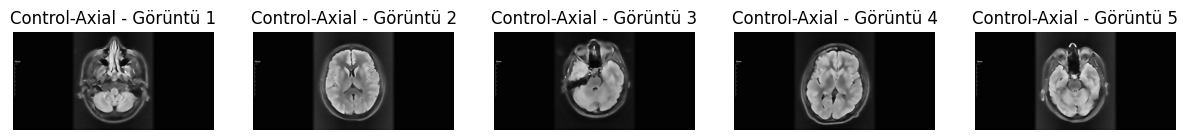

Control-Sagittal için işlenen görüntülerin görselleştirmesi:


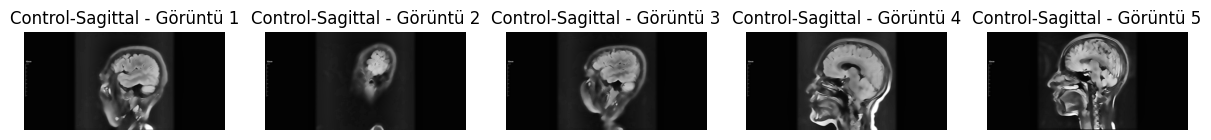

MS-Axial için işlenen görüntülerin görselleştirmesi:


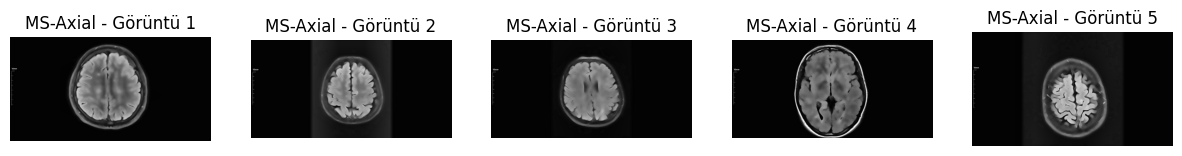

MS-Sagittal için işlenen görüntülerin görselleştirmesi:


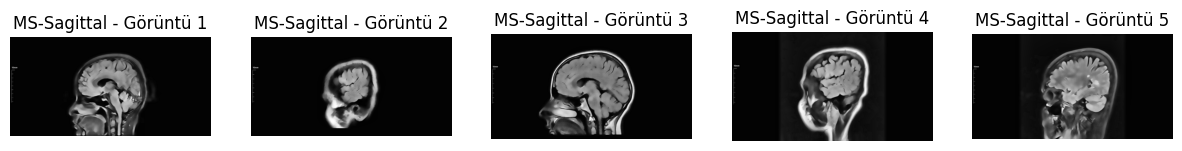

Control-Axial için işlenen görüntülerin özellikleri:
Görüntü 1: Şekil - (569, 1158), Tür - uint8
Görüntü 2: Şekil - (569, 1158), Tür - uint8
Görüntü 3: Şekil - (569, 1158), Tür - uint8
Görüntü 4: Şekil - (569, 1158), Tür - uint8
Görüntü 5: Şekil - (569, 1158), Tür - uint8
Görüntü 6: Şekil - (569, 1158), Tür - uint8
Görüntü 7: Şekil - (569, 1158), Tür - uint8
Görüntü 8: Şekil - (569, 1158), Tür - uint8
Görüntü 9: Şekil - (569, 1158), Tür - uint8
Görüntü 10: Şekil - (569, 1158), Tür - uint8
Görüntü 11: Şekil - (569, 1158), Tür - uint8
Görüntü 12: Şekil - (569, 1158), Tür - uint8
Görüntü 13: Şekil - (569, 1158), Tür - uint8
Görüntü 14: Şekil - (569, 1158), Tür - uint8
Görüntü 15: Şekil - (569, 1158), Tür - uint8
Görüntü 16: Şekil - (569, 1158), Tür - uint8
Görüntü 17: Şekil - (569, 1158), Tür - uint8
Görüntü 18: Şekil - (569, 1158), Tür - uint8
Görüntü 19: Şekil - (569, 1158), Tür - uint8
Görüntü 20: Şekil - (569, 1158), Tür - uint8
Görüntü 21: Şekil - (569, 1158), Tür - uint8
Görüntü 22:

In [ ]:
import matplotlib.pyplot as plt

# İşlenmiş görüntü örneklerini görselleştirme fonksiyonu
def visualize_processed_images(veri_setleri, num_samples=5):
    for klasor_adi, islenmis_goruntuler in veri_setleri.items():
        print(f"{klasor_adi} için işlenen görüntülerin görselleştirmesi:")
        if len(islenmis_goruntuler) > 0:
            plt.figure(figsize=(15, 3))
            for i in range(min(num_samples, len(islenmis_goruntuler))):
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(islenmis_goruntuler[i], cmap='gray')
                plt.title(f"{klasor_adi} - Görüntü {i+1}")
                plt.axis('off')
            plt.show()

# Görüntü özelliklerini kontrol etme fonksiyonu
def check_image_properties(veri_setleri):
    for klasor_adi, islenmis_goruntuler in veri_setleri.items():
        print(f"{klasor_adi} için işlenen görüntülerin özellikleri:")
        for i, image in enumerate(islenmis_goruntuler):
            print(f"Görüntü {i+1}: Şekil - {image.shape}, Tür - {image.dtype}")

# Toplam işlenmiş görüntü sayısını yazdırma fonksiyonu
def print_total_images(veri_setleri):
    toplam_goruntu_sayisi = sum(len(goruntuler) for goruntuler in veri_setleri.values())
    print(f"Toplam işlenmiş görüntü sayısı: {toplam_goruntu_sayisi}")

# Her bir veri setindeki görüntü sayısını yazdırma fonksiyonu
def print_images_per_dataset(veri_setleri):
    for klasor_adi, goruntuler in veri_setleri.items():
        goruntu_sayisi = len(goruntuler)
        print(f"{klasor_adi} veri setinde toplam {goruntu_sayisi} adet görüntü bulunmaktadır.")

# Fonksiyonları çağır
visualize_processed_images(veri_setleri)
check_image_properties(veri_setleri)
print_total_images(veri_setleri)
print_images_per_dataset(veri_setleri)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Etiketleri ve Görüntüleri Birleştirme
tum_goruntuler = []
tum_etiketler = []

for klasor_adi, islenmis_goruntuler in veri_setleri.items():
    for goruntu in islenmis_goruntuler:
        tum_goruntuler.append(goruntu)
        tum_etiketler.append(klasor_adi)

# Veri Setlerini Bölme
X_train, X_temp, y_train, y_temp = train_test_split(tum_goruntuler, tum_etiketler, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Etiketleri One-Hot Encoding İle Dönüştürme
unique_etiketler = list(set(tum_etiketler))
etiket_map = {etiket: index for index, etiket in enumerate(unique_etiketler)}
y_train_encoded = to_categorical([etiket_map[etiket] for etiket in y_train], num_classes=len(unique_etiketler))
y_val_encoded = to_categorical([etiket_map[etiket] for etiket in y_val], num_classes=len(unique_etiketler))
y_test_encoded = to_categorical([etiket_map[etiket] for etiket in y_test], num_classes=len(unique_etiketler))

# Sonucu kontrol et
print(f"Training set: {len(X_train)} images, {len(y_train_encoded)} labels")
print(f"Validation set: {len(X_val)} images, {len(y_val_encoded)} labels")
print(f"Test set: {len(X_test)} images, {len(y_test_encoded)} labels")

Training set: 1200 images, 1200 labels
Validation set: 400 images, 400 labels
Test set: 400 images, 400 labels


In [ ]:
import os
from PIL import Image
import numpy as np

# Hedef klasör yollarını tanımlama
hedef_klasorler = {
    'train': '/content/drive/MyDrive/Multiple Sclerosis/Split/Train',
    'val': '/content/drive/MyDrive/Multiple Sclerosis/Split/Validation',
    'test': '/content/drive/MyDrive/Multiple Sclerosis/Split/Test'
}

# Görüntüleri ilgili klasörlere kaydetme
def goruntuleri_kaydet(goruntuler, etiketler, hedef_klasor):
    for i, (goruntu, etiket) in enumerate(zip(goruntuler, etiketler)):
        # Görüntüyü PIL Image formatına dönüştür
        if goruntu.max() > 1:
            # Görüntü zaten 0-255 aralığında ise doğrudan kaydet
            goruntu_img = Image.fromarray(goruntu.astype(np.uint8))
        else:
            # Görüntü 0-1 aralığında ise 255 ile çarp ve kaydet
            goruntu_img = Image.fromarray((goruntu * 255).astype(np.uint8))
        goruntu_adi = f"{etiket}_{i}.png"
        goruntu_yolu = os.path.join(hedef_klasor, goruntu_adi)
        goruntu_img.save(goruntu_yolu)


# Eğitim, doğrulama ve test setlerini kaydetme
goruntuleri_kaydet(X_train, y_train, hedef_klasorler['train'])
goruntuleri_kaydet(X_val, y_val, hedef_klasorler['val'])
goruntuleri_kaydet(X_test, y_test, hedef_klasorler['test'])


In [ ]:
for kategori, klasor_yolu in hedef_klasorler.items():
    dosya_sayisi = len([dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith('.png')])
    print(f"{kategori} klasöründe {dosya_sayisi} adet dosya var.")


train klasöründe 1200 adet dosya var.
val klasöründe 400 adet dosya var.
test klasöründe 400 adet dosya var.


Train Set:


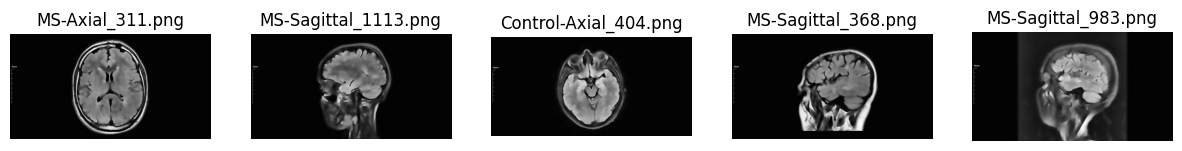

Val Set:


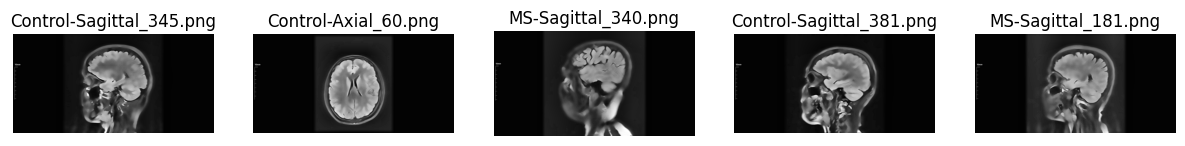

Test Set:


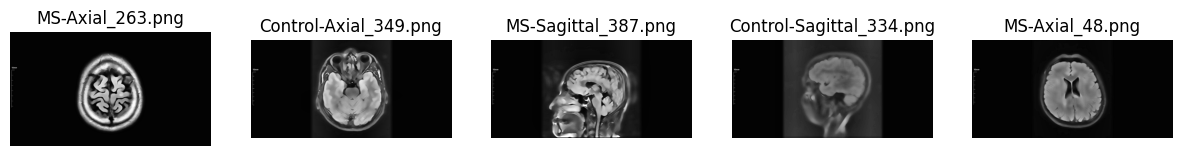

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def visualize_saved_images(klasor_yolu, num_samples=5):
    # Klasördeki tüm dosya isimlerini al
    dosyalar = os.listdir(klasor_yolu)
    # Rastgele seçilen dosya isimlerini al
    secilen_dosyalar = np.random.choice(dosyalar, num_samples, replace=False)

    plt.figure(figsize=(15, 3))
    for i, dosya_adi in enumerate(secilen_dosyalar):
        # Görüntüyü yükle
        goruntu_yolu = os.path.join(klasor_yolu, dosya_adi)
        with Image.open(goruntu_yolu) as img:
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img, cmap='gray')  # 'cmap' parametresi gri tonlamada görüntü sağlar
            plt.title(dosya_adi)
            plt.axis('off')
    plt.show()

# Her bir hedef klasör için kaydedilen görüntüleri görselleştir
for klasor_adi, klasor_yolu in hedef_klasorler.items():
    print(f"{klasor_adi.capitalize()} Set:")
    visualize_saved_images(klasor_yolu)


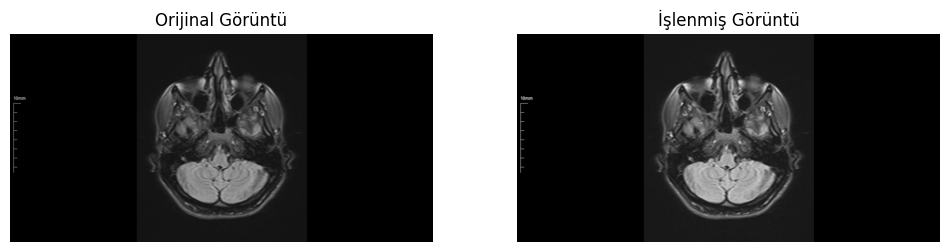

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from PIL import Image

# Örnek bir görüntü seçme fonksiyonu
def choose_sample_image(klasor_yolu):
    dosyalar = os.listdir(klasor_yolu)
    ornek_dosya = random.choice(dosyalar)
    ornek_dosya_yolu = os.path.join(klasor_yolu, ornek_dosya)
    return ornek_dosya_yolu

# İşleme fonksiyonu
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Burada işleme adımlarınızı ekleyin
    # Örneğin:
    # image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Orijinal ve işlenmiş görüntüyü görselleştirme fonksiyonu
def visualize_original_and_processed(image_path):
    original_image = Image.open(image_path)
    processed_image = preprocess_image(image_path)

    plt.figure(figsize=(12, 6))

    # Orijinal görüntüyü görselleştirme
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Orijinal Görüntü')
    plt.axis('off')

    # İşlenmiş görüntüyü görselleştirme
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title('İşlenmiş Görüntü')
    plt.axis('off')

    plt.show()

# Örnek olarak bir klasör yolu seçin ve oradan bir görüntü seçin
klasor_yolu = '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial'  # Klasör yolunu değiştirin
ornek_dosya_yolu = choose_sample_image(klasor_yolu)

# Orijinal ve işlenmiş görüntüyü görselleştir
visualize_original_and_processed(ornek_dosya_yolu)


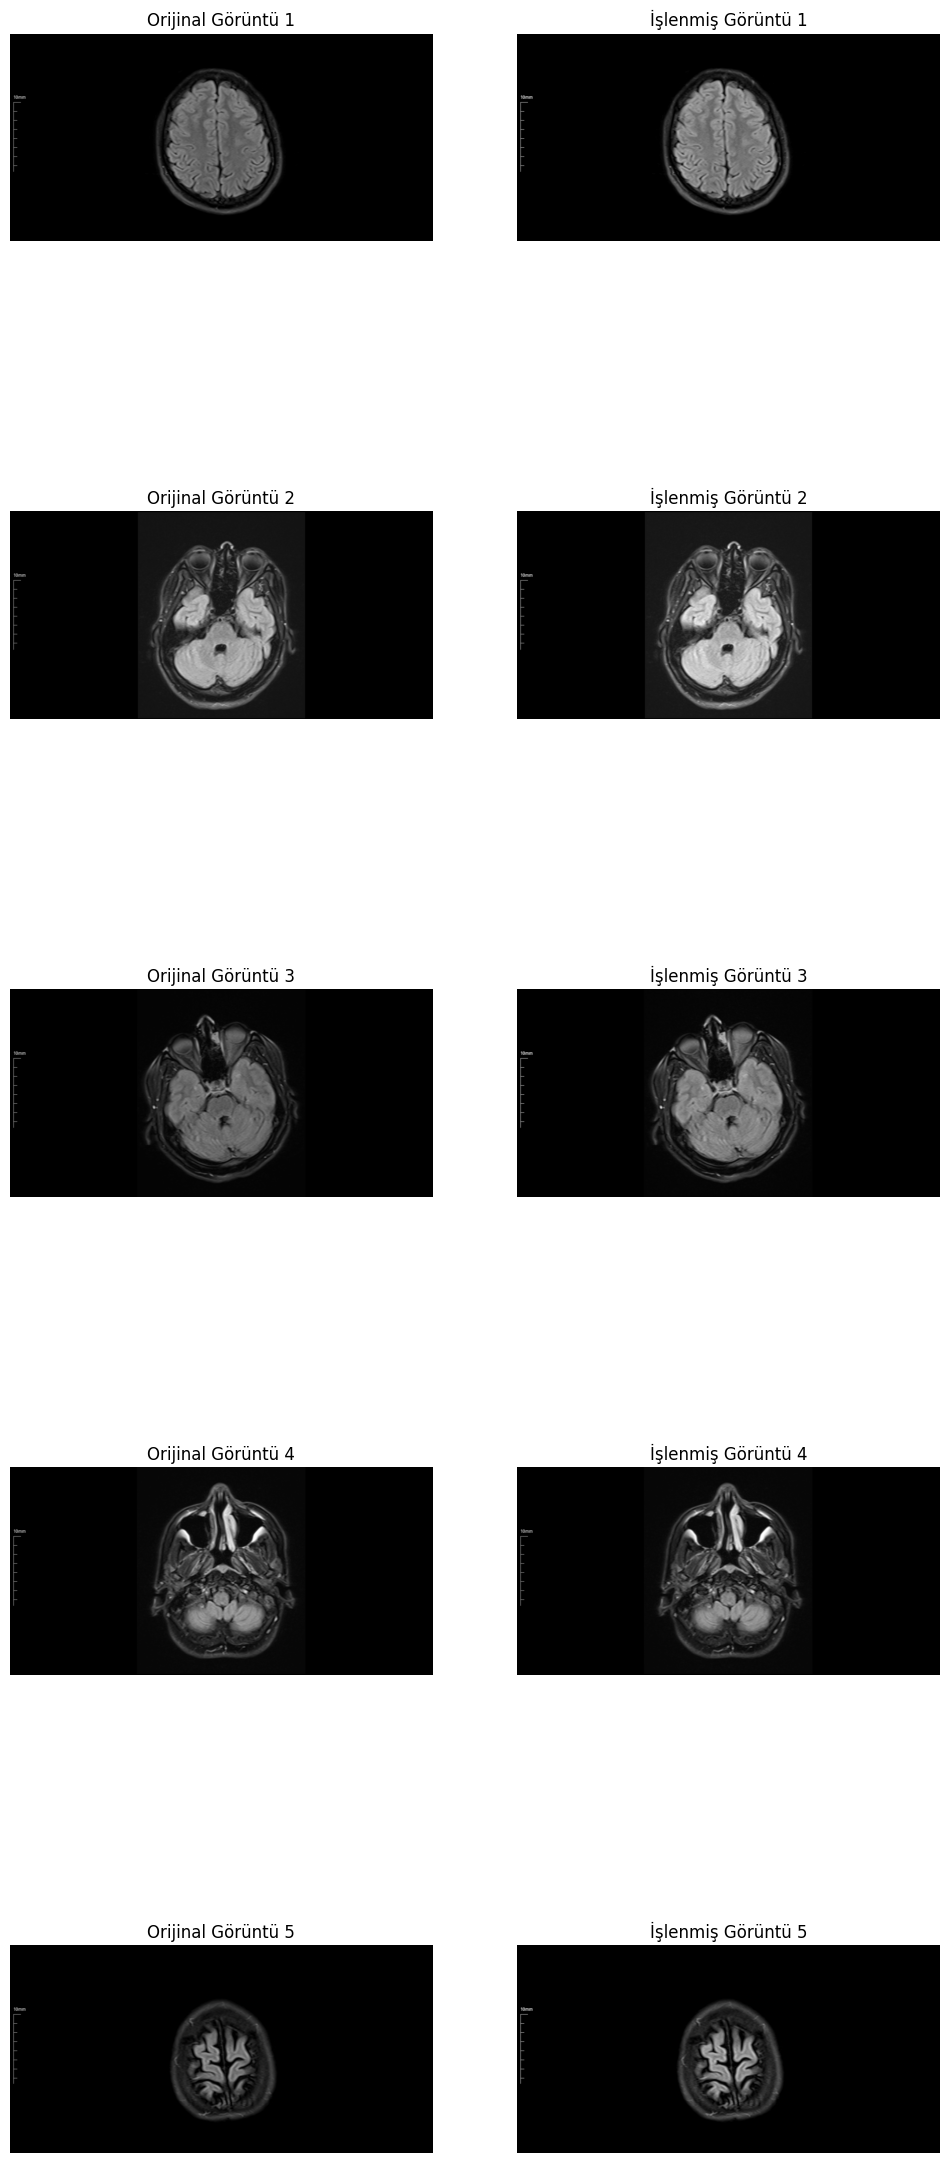

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from PIL import Image

# Örnek beş görüntü seçme fonksiyonu
def choose_sample_images(klasor_yolu, num_samples=5):
    dosyalar = os.listdir(klasor_yolu)
    ornek_dosyalar = random.sample(dosyalar, num_samples)
    ornek_dosya_yollari = [os.path.join(klasor_yolu, dosya) for dosya in ornek_dosyalar]
    return ornek_dosya_yollari

# İşleme fonksiyonu
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Burada işleme adımlarınızı ekleyin
    # Örneğin:
    # image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Orijinal ve işlenmiş görüntüleri görselleştirme fonksiyonu
def visualize_original_and_processed(image_paths):
    plt.figure(figsize=(12, 6 * len(image_paths)))

    for i, image_path in enumerate(image_paths):
        original_image = Image.open(image_path)
        processed_image = preprocess_image(image_path)

        # Orijinal görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f'Orijinal Görüntü {i+1}')
        plt.axis('off')

        # İşlenmiş görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 2)
        plt.imshow(processed_image, cmap='gray')
        plt.title(f'İşlenmiş Görüntü {i+1}')
        plt.axis('off')

    plt.show()

# Örnek olarak bir klasör yolu seçin ve oradan beş görüntü seçin
klasor_yolu = '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial'  # Klasör yolunu değiştirin
ornek_dosya_yollari = choose_sample_images(klasor_yolu)

# Orijinal ve işlenmiş görüntüleri görselleştir
visualize_original_and_processed(ornek_dosya_yollari)


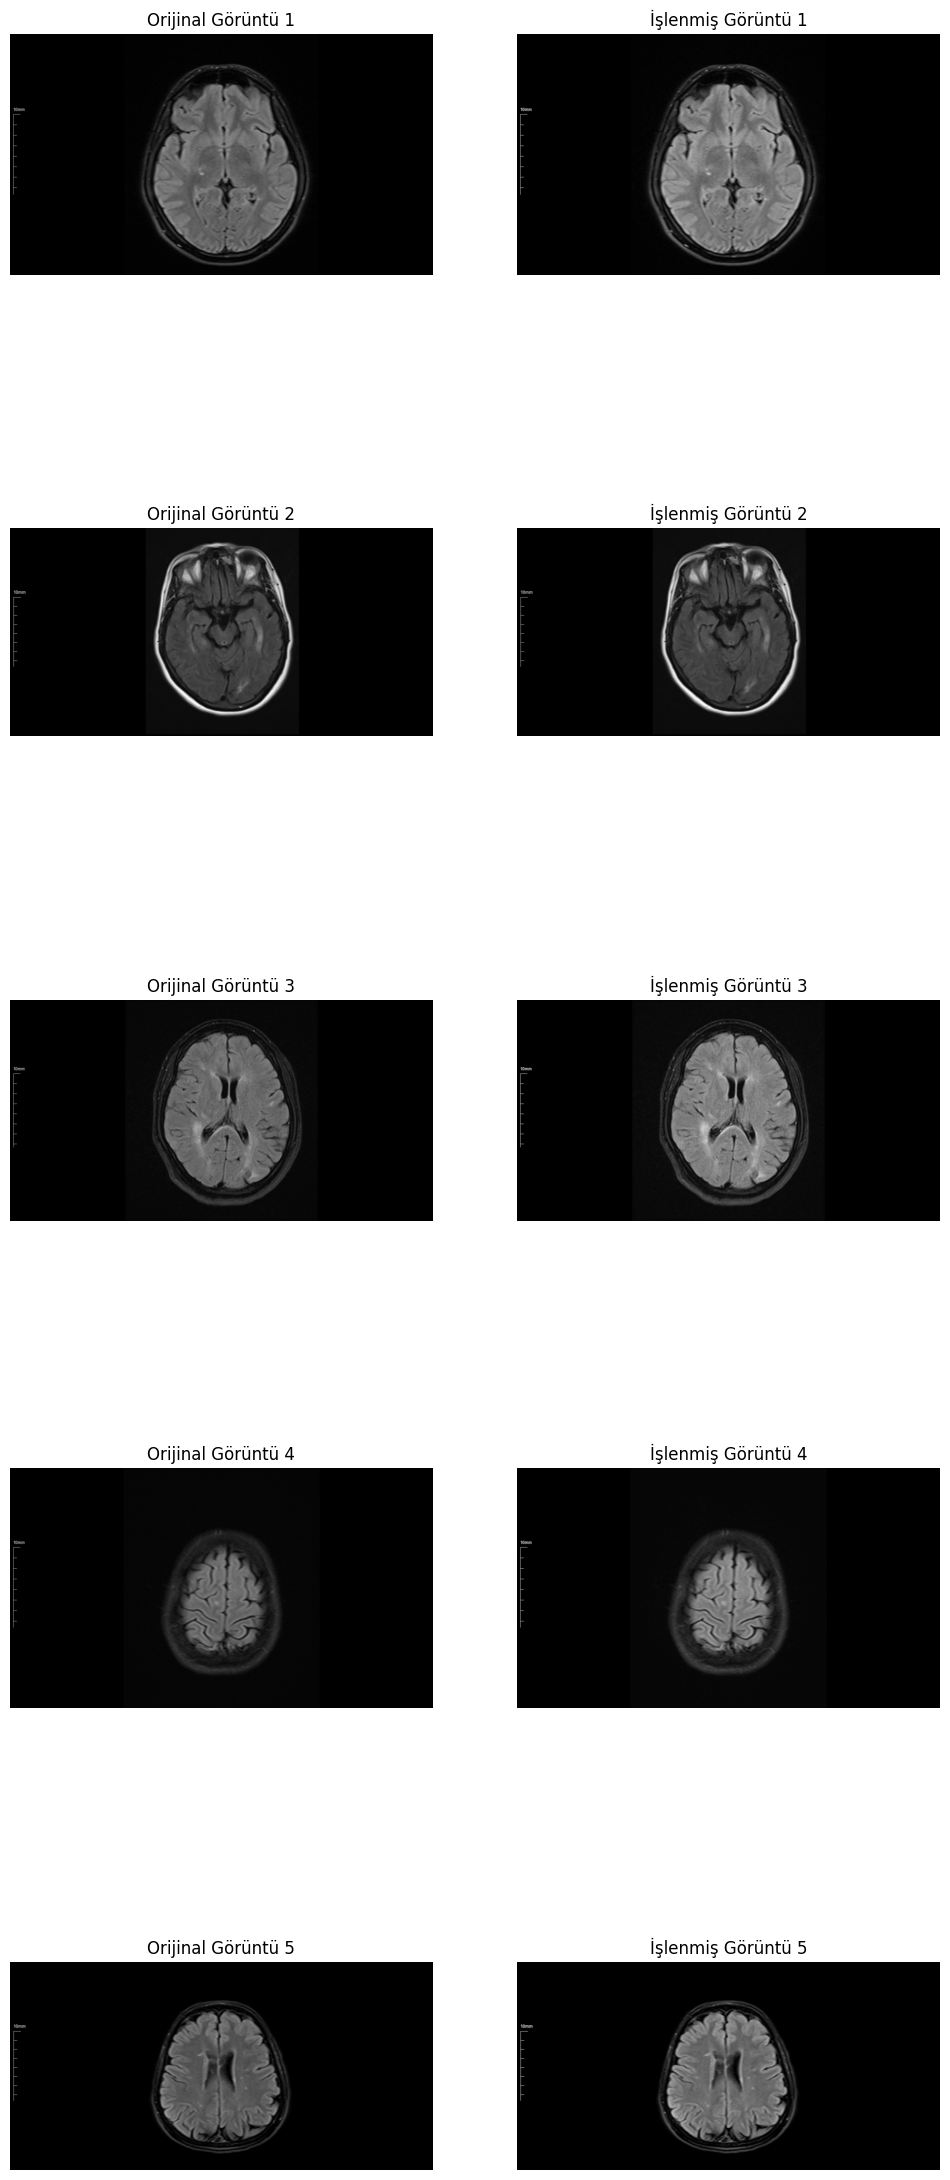

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from PIL import Image

# Örnek beş görüntü seçme fonksiyonu
def choose_sample_images(klasor_yolu, num_samples=5):
    dosyalar = os.listdir(klasor_yolu)
    ornek_dosyalar = random.sample(dosyalar, num_samples)
    ornek_dosya_yollari = [os.path.join(klasor_yolu, dosya) for dosya in ornek_dosyalar]
    return ornek_dosya_yollari

# İşleme fonksiyonu
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Burada işleme adımlarınızı ekleyin
    # Örneğin:
    # image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Orijinal ve işlenmiş görüntüleri görselleştirme fonksiyonu
def visualize_original_and_processed(image_paths):
    plt.figure(figsize=(12, 6 * len(image_paths)))

    for i, image_path in enumerate(image_paths):
        original_image = Image.open(image_path)
        processed_image = preprocess_image(image_path)

        # Orijinal görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f'Orijinal Görüntü {i+1}')
        plt.axis('off')

        # İşlenmiş görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 2)
        plt.imshow(processed_image, cmap='gray')
        plt.title(f'İşlenmiş Görüntü {i+1}')
        plt.axis('off')

    plt.show()

# Örnek olarak bir klasör yolu seçin ve oradan beş görüntü seçin
klasor_yolu = '/content/drive/MyDrive/Multiple Sclerosis/MS-Axial'  # Klasör yolunu değiştirin
ornek_dosya_yollari = choose_sample_images(klasor_yolu)

# Orijinal ve işlenmiş görüntüleri görselleştir
visualize_original_and_processed(ornek_dosya_yollari)

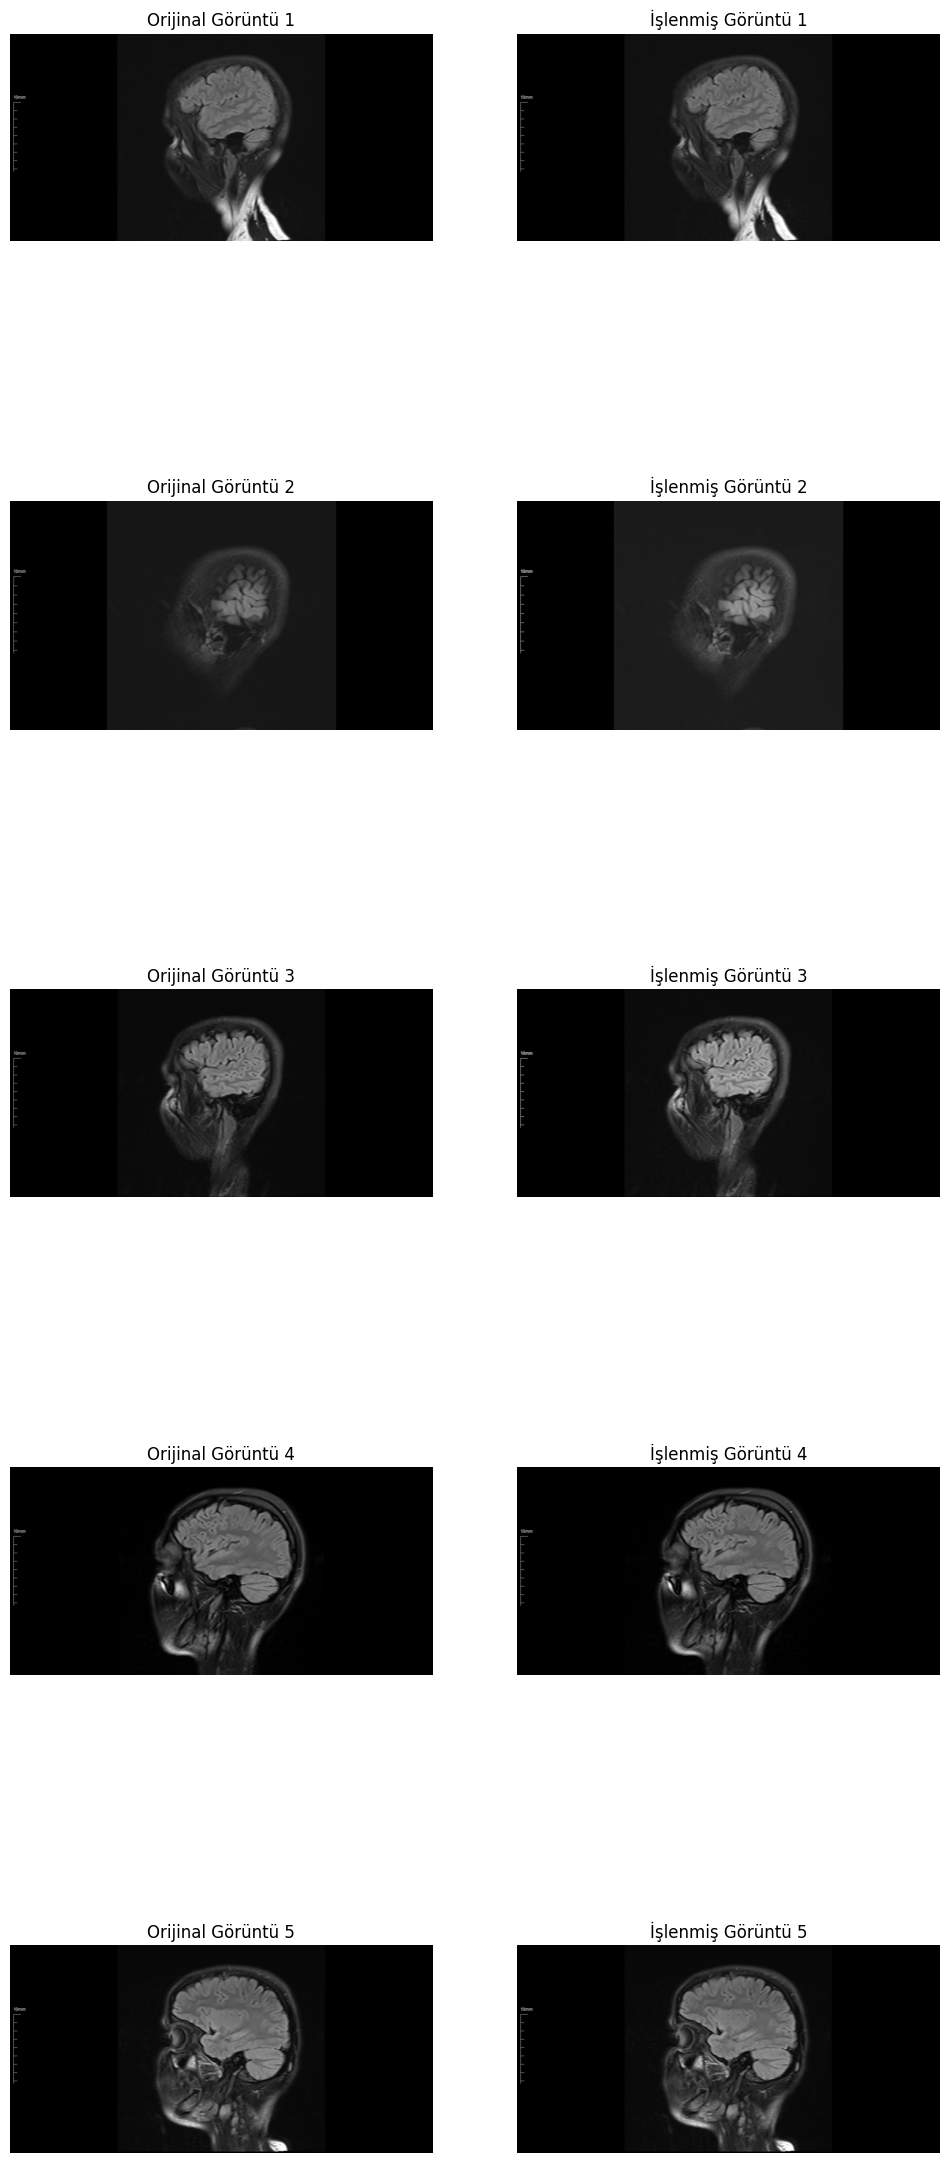

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from PIL import Image

# Örnek beş görüntü seçme fonksiyonu
def choose_sample_images(klasor_yolu, num_samples=5):
    dosyalar = os.listdir(klasor_yolu)
    ornek_dosyalar = random.sample(dosyalar, num_samples)
    ornek_dosya_yollari = [os.path.join(klasor_yolu, dosya) for dosya in ornek_dosyalar]
    return ornek_dosya_yollari

# İşleme fonksiyonu
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Burada işleme adımlarınızı ekleyin
    # Örneğin:
    # image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Orijinal ve işlenmiş görüntüleri görselleştirme fonksiyonu
def visualize_original_and_processed(image_paths):
    plt.figure(figsize=(12, 6 * len(image_paths)))

    for i, image_path in enumerate(image_paths):
        original_image = Image.open(image_path)
        processed_image = preprocess_image(image_path)

        # Orijinal görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f'Orijinal Görüntü {i+1}')
        plt.axis('off')

        # İşlenmiş görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 2)
        plt.imshow(processed_image, cmap='gray')
        plt.title(f'İşlenmiş Görüntü {i+1}')
        plt.axis('off')

    plt.show()

# Örnek olarak bir klasör yolu seçin ve oradan beş görüntü seçin
klasor_yolu = '/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal'  # Klasör yolunu değiştirin
ornek_dosya_yollari = choose_sample_images(klasor_yolu)

# Orijinal ve işlenmiş görüntüleri görselleştir
visualize_original_and_processed(ornek_dosya_yollari)

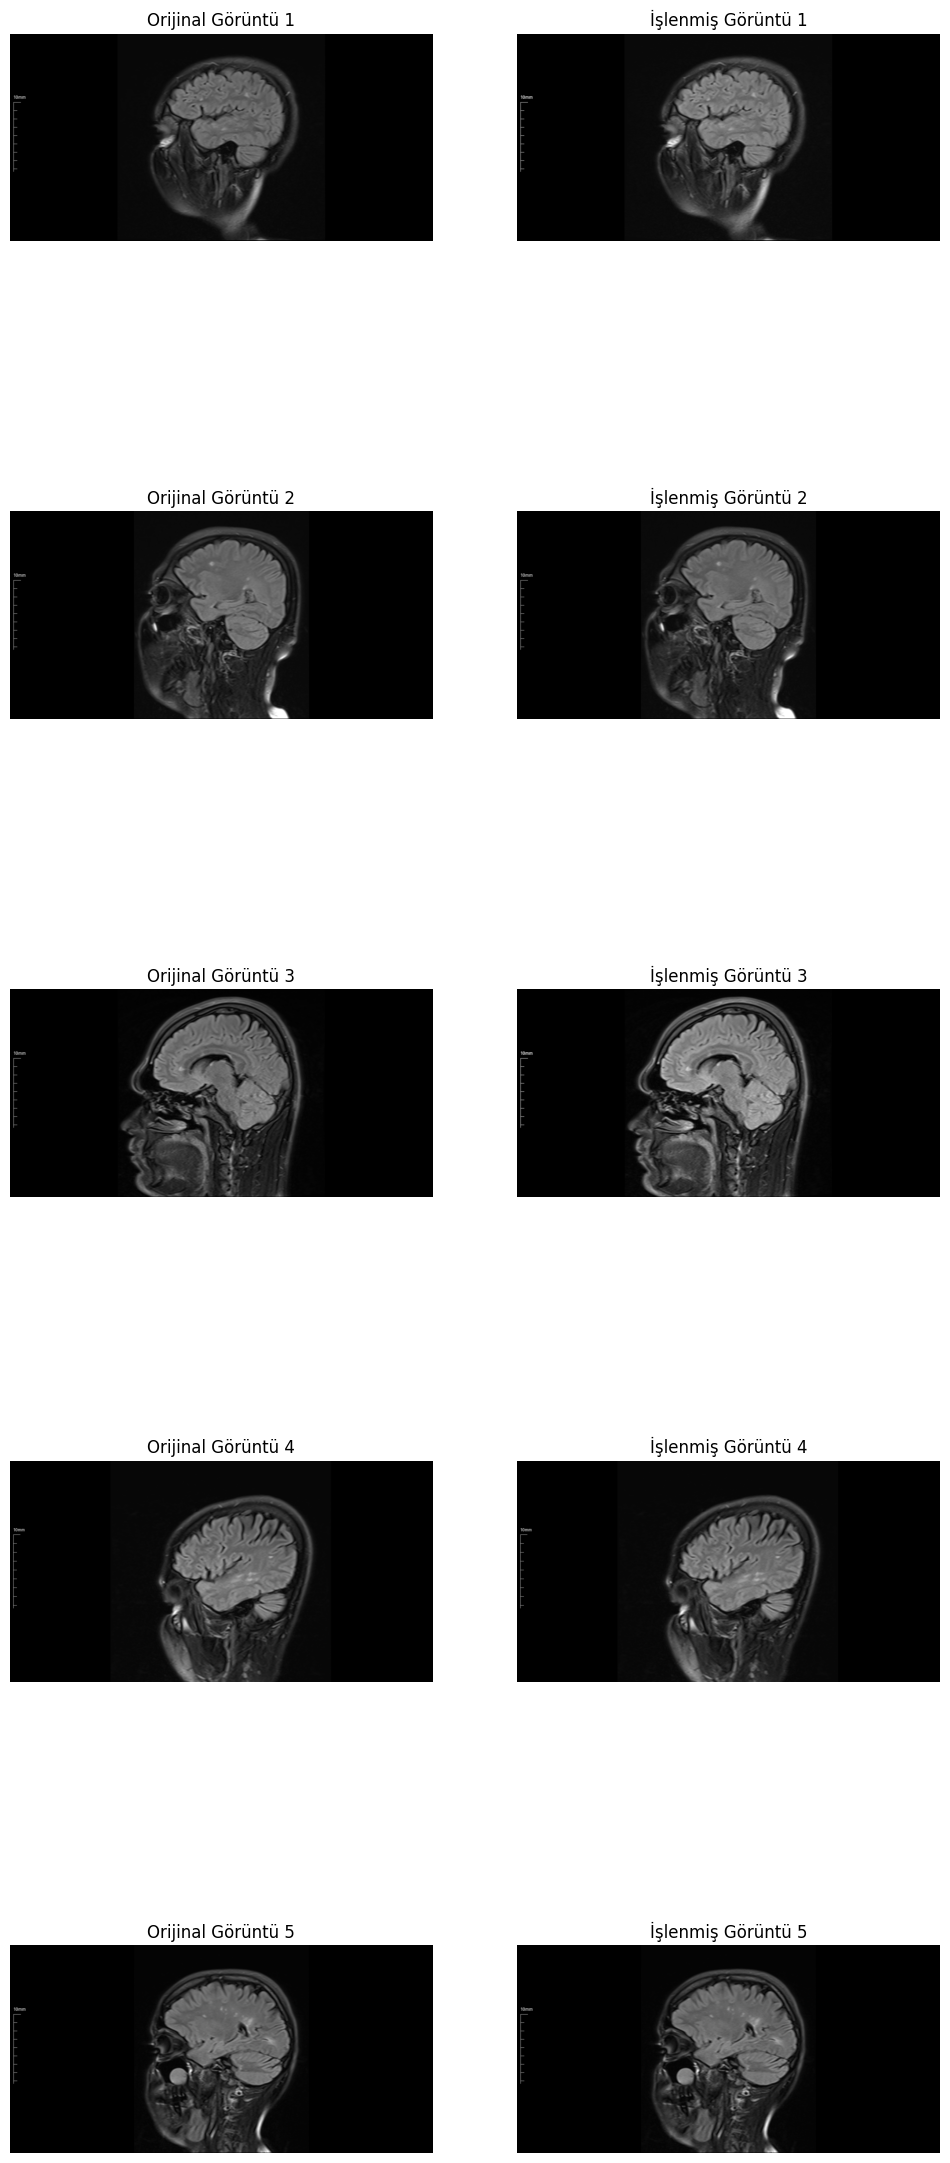

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
from PIL import Image

# Örnek beş görüntü seçme fonksiyonu
def choose_sample_images(klasor_yolu, num_samples=5):
    dosyalar = os.listdir(klasor_yolu)
    ornek_dosyalar = random.sample(dosyalar, num_samples)
    ornek_dosya_yollari = [os.path.join(klasor_yolu, dosya) for dosya in ornek_dosyalar]
    return ornek_dosya_yollari

# İşleme fonksiyonu
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Burada işleme adımlarınızı ekleyin
    # Örneğin:
    # image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Orijinal ve işlenmiş görüntüleri görselleştirme fonksiyonu
def visualize_original_and_processed(image_paths):
    plt.figure(figsize=(12, 6 * len(image_paths)))

    for i, image_path in enumerate(image_paths):
        original_image = Image.open(image_path)
        processed_image = preprocess_image(image_path)

        # Orijinal görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f'Orijinal Görüntü {i+1}')
        plt.axis('off')

        # İşlenmiş görüntüyü görselleştirme
        plt.subplot(len(image_paths), 2, i * 2 + 2)
        plt.imshow(processed_image, cmap='gray')
        plt.title(f'İşlenmiş Görüntü {i+1}')
        plt.axis('off')

    plt.show()

# Örnek olarak bir klasör yolu seçin ve oradan beş görüntü seçin
klasor_yolu = '/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'  # Klasör yolunu değiştirin
ornek_dosya_yollari = choose_sample_images(klasor_yolu)

# Orijinal ve işlenmiş görüntüleri görselleştir
visualize_original_and_processed(ornek_dosya_yollari)